> # Import Modules

In [9]:
import sys
import os
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from noventis.data_cleaner import NoventisDataCleaner
from noventis import data_cleaner 
print('Successfully imported modules!')

Successfully imported modules!


> # Using the NoventisDataCleaner Class for Full Control

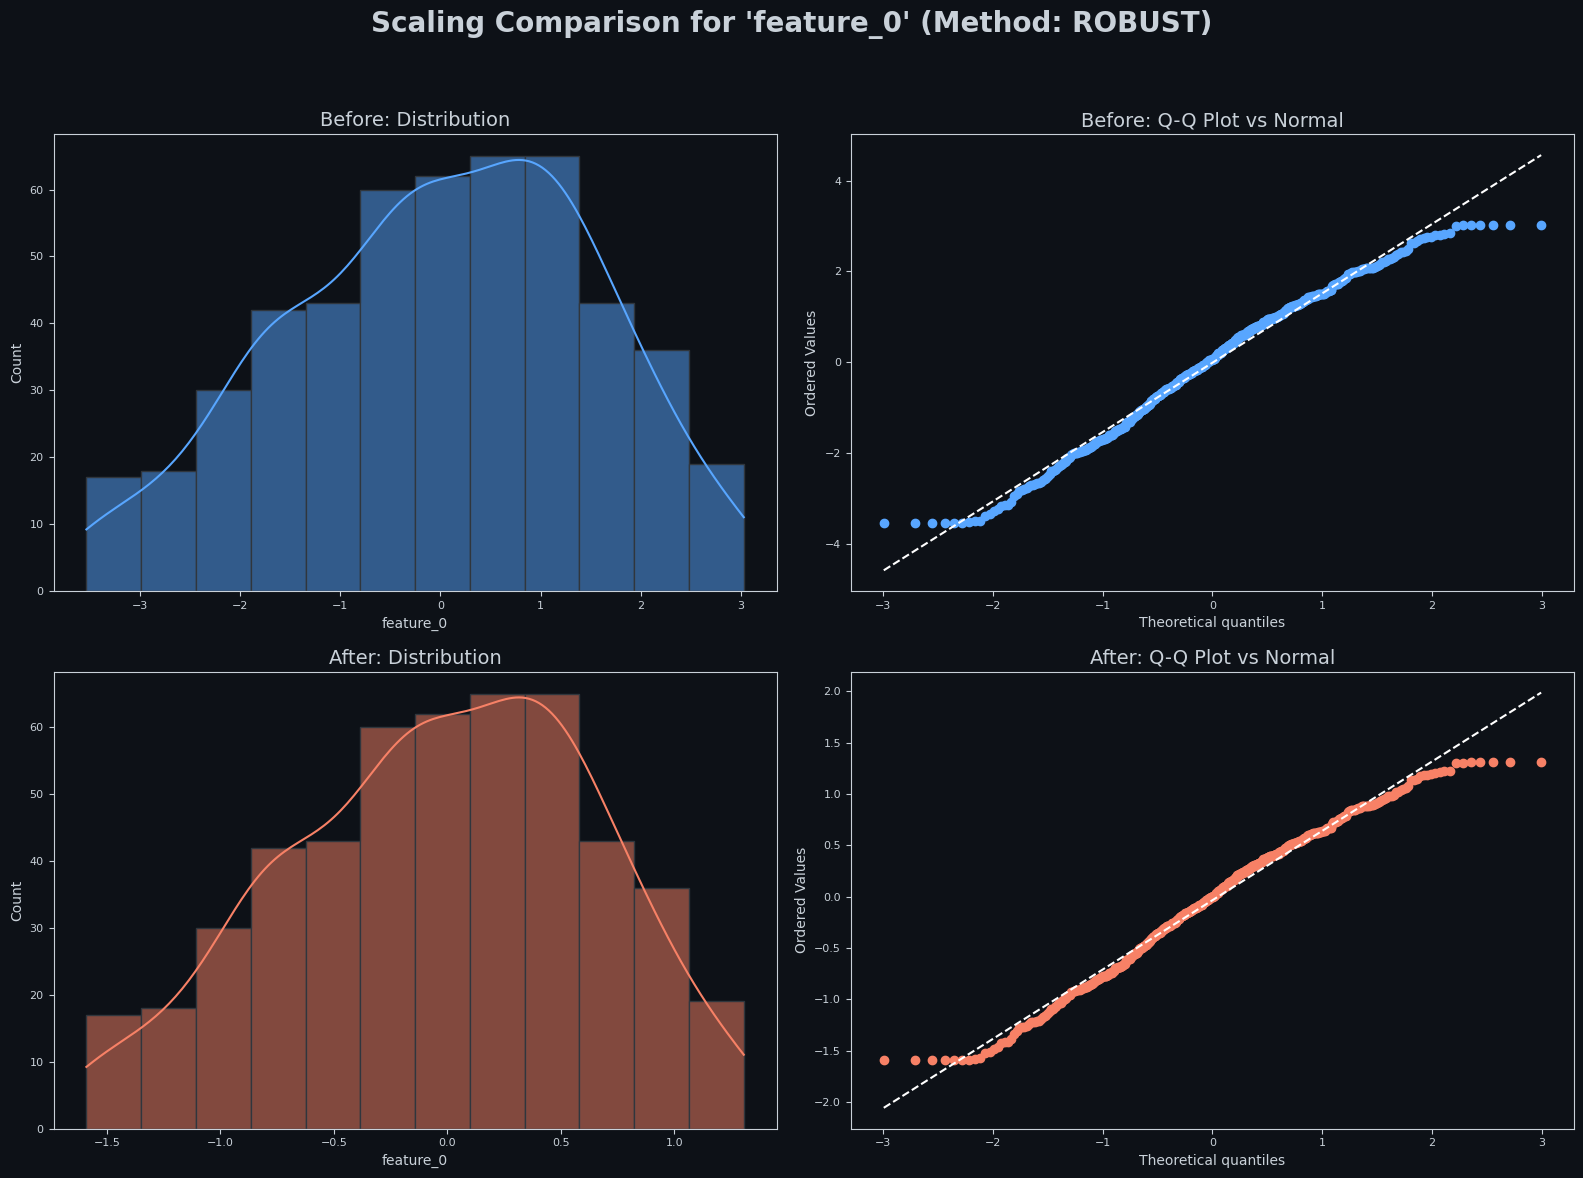

[]


feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14
-0.069258,-0.430715,-1.744331,1.193559,-1.125162,0.450656,2.080766,2.066948,0.582244,-0.065975,-1.283640,-0.146060,2.117558,0.423342,-1.330429
0.213132,0.865199,2.075638,1.875315,0.564281,0.816007,0.009881,0.791630,-0.372272,0.824749,-0.230840,0.166662,2.125089,-1.649033,-0.824939
3.008017,0.845526,0.816868,-0.369623,1.603864,-0.721963,0.775424,0.395158,-0.426269,0.401919,-1.607170,1.151220,-0.020292,1.203048,1.035723
-0.098569,0.990238,-0.023025,-0.245344,3.099312,-0.454034,-1.156978,0.115064,-0.728678,-0.292009,0.603225,-0.586966,-0.820236,-1.508188,0.851167
1.212055,-0.206481,-1.354018,2.234223,0.115950,0.159159,-0.492144,0.310280,-0.553192,0.703642,-0.856566,0.560481,2.293485,1.768772,-1.303937

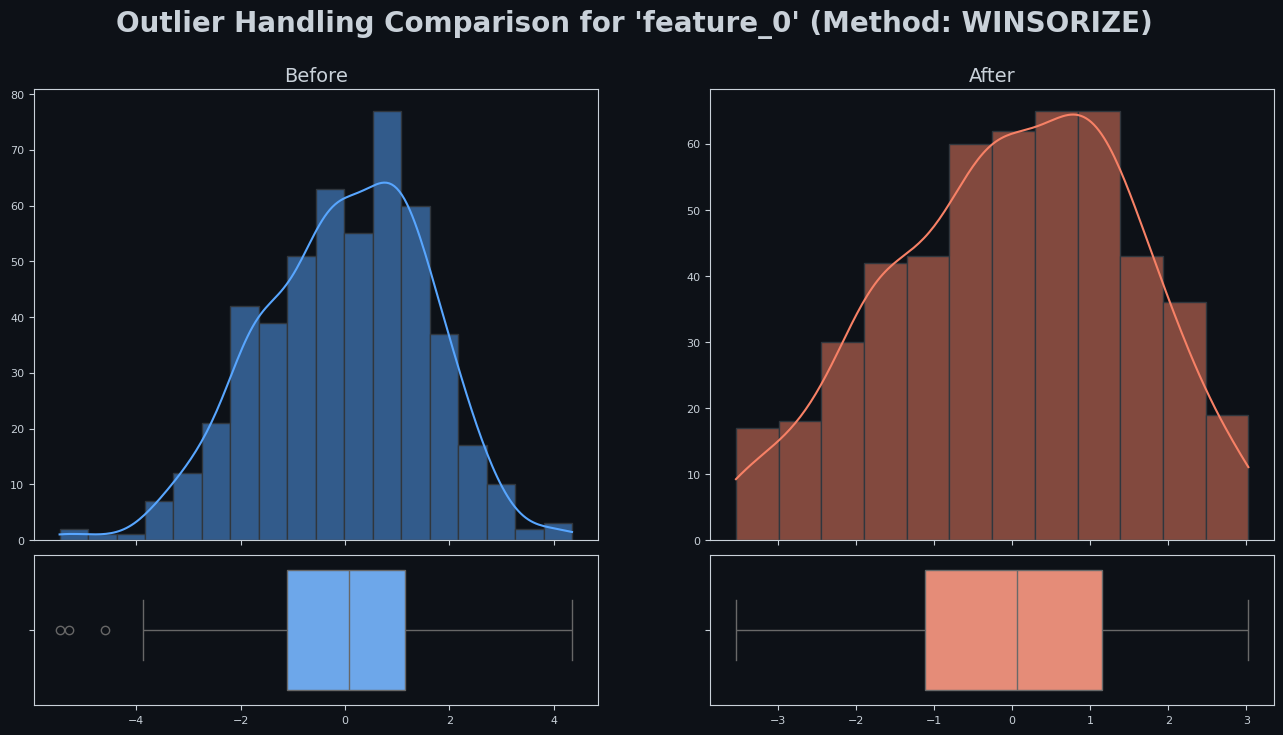

In [10]:
df = pd.read_csv('../dataset_for_examples/dummy_classification_churn.csv')

X = df.drop(columns=['churn'])
y = df['churn']

imputer_config = {'method': 'median'}
outlier_config = {'default_method': 'winsorize', 'quantile_range': (0.01, 0.99)}
encoder_config = {'method': 'auto', 'target_column': 'YourTargetColumnName'}
scaler_config = {'method': 'robust'}

cleaner = NoventisDataCleaner(
    pipeline_steps=['impute', 'outlier', 'encode', 'scale'],
    imputer_params=imputer_config,
    outlier_params=outlier_config,
    encoder_params=encoder_config,
    scaler_params=scaler_config,
    verbose=False
)

cleaned_df = cleaner.fit_transform(X, y)

cleaner.generate_html_report()

STARTING NOVENTIS DATA CLEANER PIPELINE

Executing Step: IMPUTE...
Step IMPUTE Complete.

Executing Step: OUTLIER...
Step OUTLIER Complete.

Executing Step: ENCODE...
Step ENCODE Complete.

Executing Step: SCALE...
Step SCALE Complete.

PIPELINE FINISHED

====================== DATA QUALITY REPORT ======================
  Final Quality Score: 99.30/100
     - Completeness Score                 : 100.00     (Weight: 40%)
     - Data Consistency Score             : 98.67      (Weight: 0%)
     - Distribution Quality Score         : 98.48      (Weight: 20%)
     - Feature Engineering Score          : 100.00     (Weight: 10%)

PIPELINE PROCESS SUMMARY
  - Imputation: Successfully filled 0 missing values.
  - Outliers: Removed 0 rows and winsorized 60 rows identified as outliers.
  - Encoding: Transformed 0 categorical columns into 0 new features.
  - Scaling: Standardized the scale for 10 numerical columns.



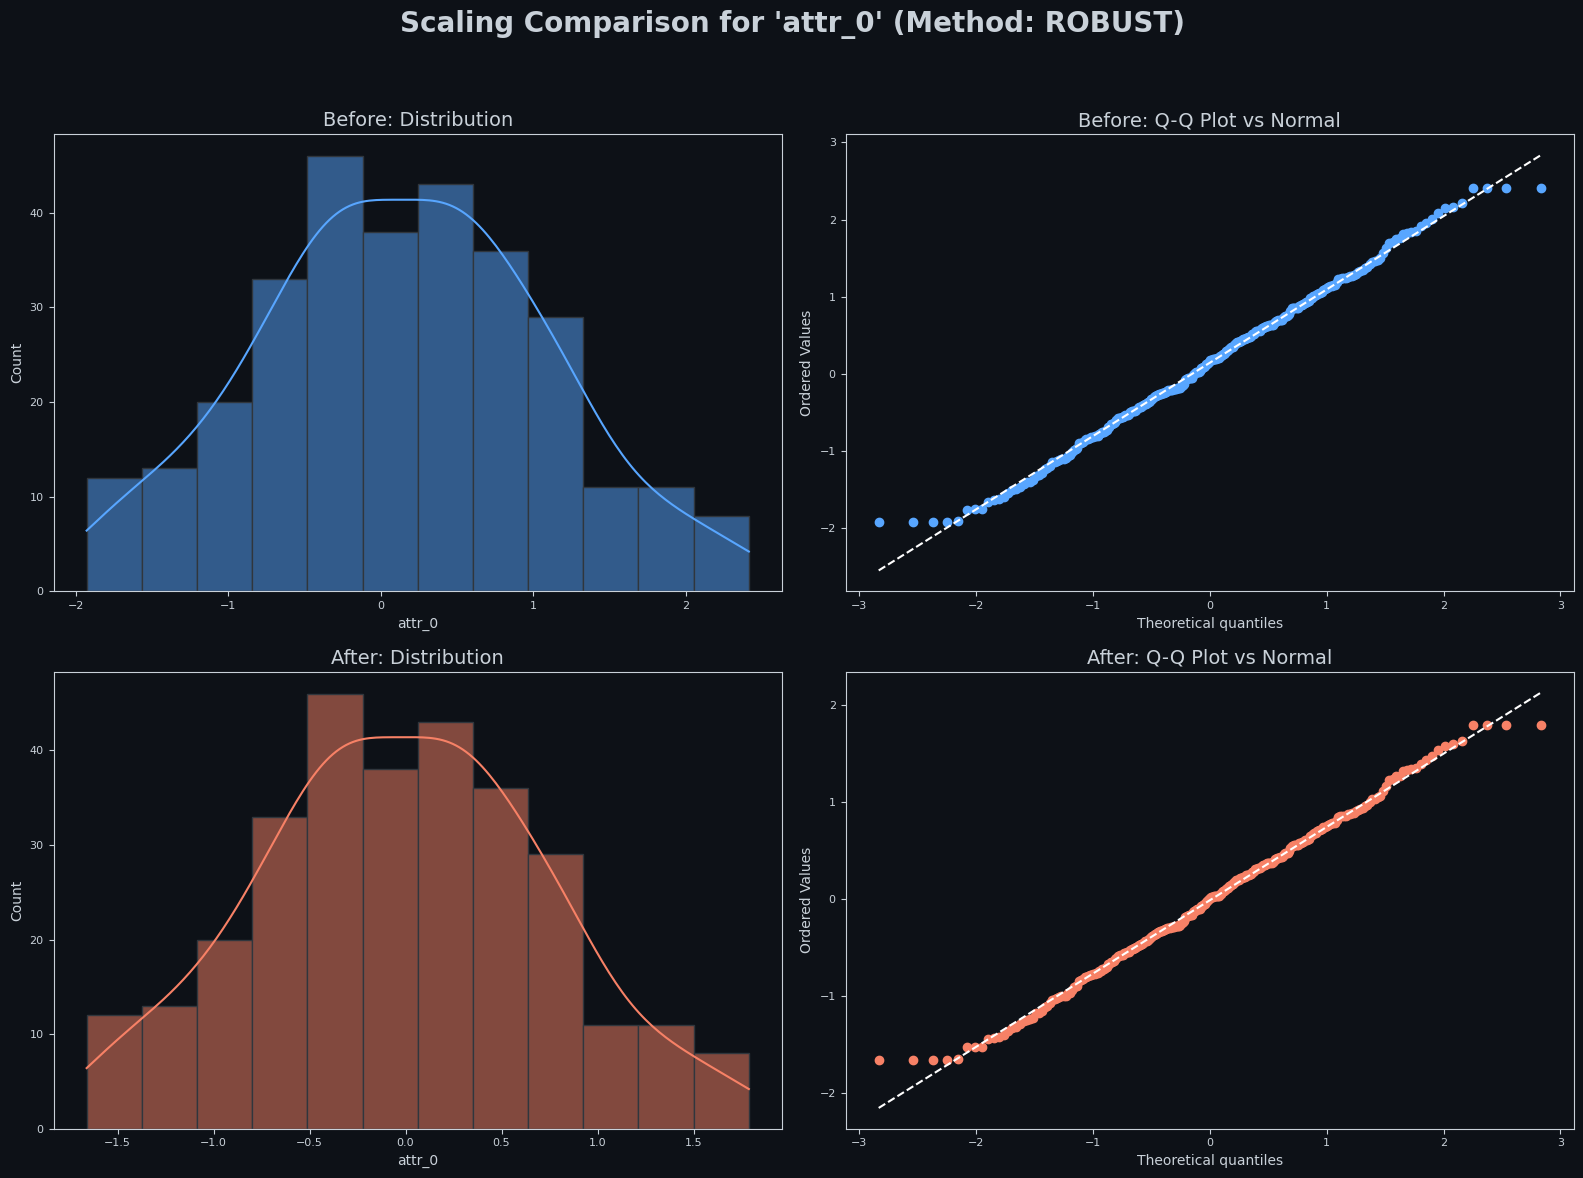

[]


attr_0,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9
0.260322,1.775311,-0.250047,-0.670620,1.000582,-1.193637,1.392465,-0.646227,0.919154,0.288694
-0.968344,1.392002,-0.224633,0.940771,-0.989628,0.918317,-0.982487,0.179894,-1.570501,0.550052
0.181427,-0.649765,-1.296117,-0.351921,-0.487203,-1.203201,-0.769996,0.874517,-1.042044,-0.456121
0.852433,0.216459,0.186454,0.633919,2.143944,0.045572,-2.025143,-0.730367,-0.651600,-0.661786
-0.435486,-0.120381,0.190500,-0.090533,-0.535328,-2.172670,0.331980,1.107081,0.847422,0.709452

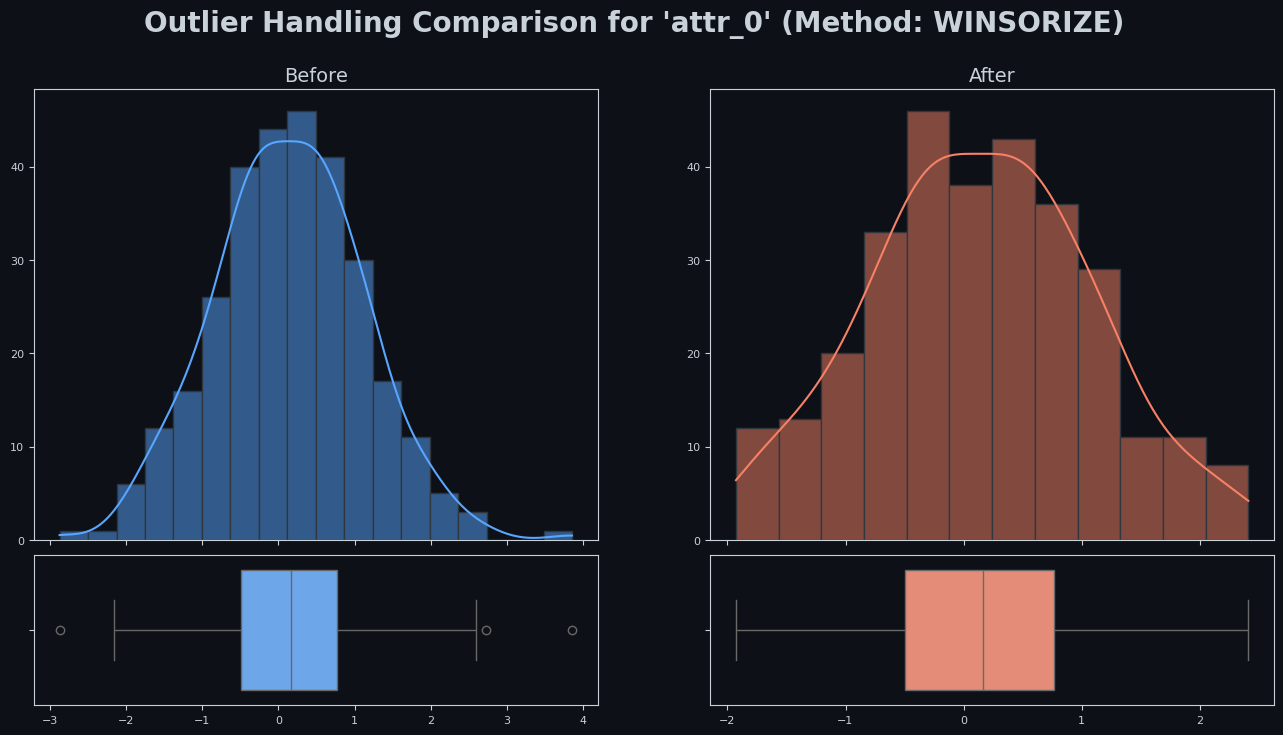

In [12]:
df_raw = pd.read_csv('../dataset_for_examples/dummy_regression_house_price.csv')

X = df_raw.drop(columns=['house_price'])
y = df_raw['house_price']

imputer_config = {'method': 'median'}
outlier_config = {'default_method': 'winsorize', 'quantile_range': (0.01, 0.99)}
encoder_config = {'method': 'auto', 'target_column': 'YourTargetColumnName'}
scaler_config = {'method': 'robust'}

cleaner = NoventisDataCleaner(
    pipeline_steps=['impute', 'outlier', 'encode', 'scale'],
    imputer_params=imputer_config,
    outlier_params=outlier_config,
    encoder_params=encoder_config,
    scaler_params=scaler_config,
    verbose=True
)

cleaned_df = cleaner.fit_transform(X, y)

cleaner.generate_html_report()

> # Using the Function and Getting the Report

Target column 'SalePrice' identified.
STARTING NOVENTIS DATA CLEANER PIPELINE

Executing Step: IMPUTE...
Step IMPUTE Complete.

Executing Step: OUTLIER...
Step OUTLIER Complete.

Executing Step: ENCODE...
Step ENCODE Complete.

Executing Step: SCALE...
Step SCALE Complete.

PIPELINE FINISHED

====================== DATA QUALITY REPORT ======================
  Final Quality Score: 51.96/100
     - Completeness Score                 : 99.39      (Weight: 40%)
     - Data Consistency Score             : 7.35       (Weight: 0%)
     - Distribution Quality Score         : 0.00       (Weight: 20%)
     - Feature Engineering Score          : 100.00     (Weight: 10%)

PIPELINE PROCESS SUMMARY
  - Imputation: Successfully filled 15749 missing values.
  - Outliers: Removed 1256 rows and winsorized 3733 rows identified as outliers.
  - Encoding: Transformed 43 categorical columns into 126 new features.
  - Scaling: Standardized the scale for 164 numerical columns.



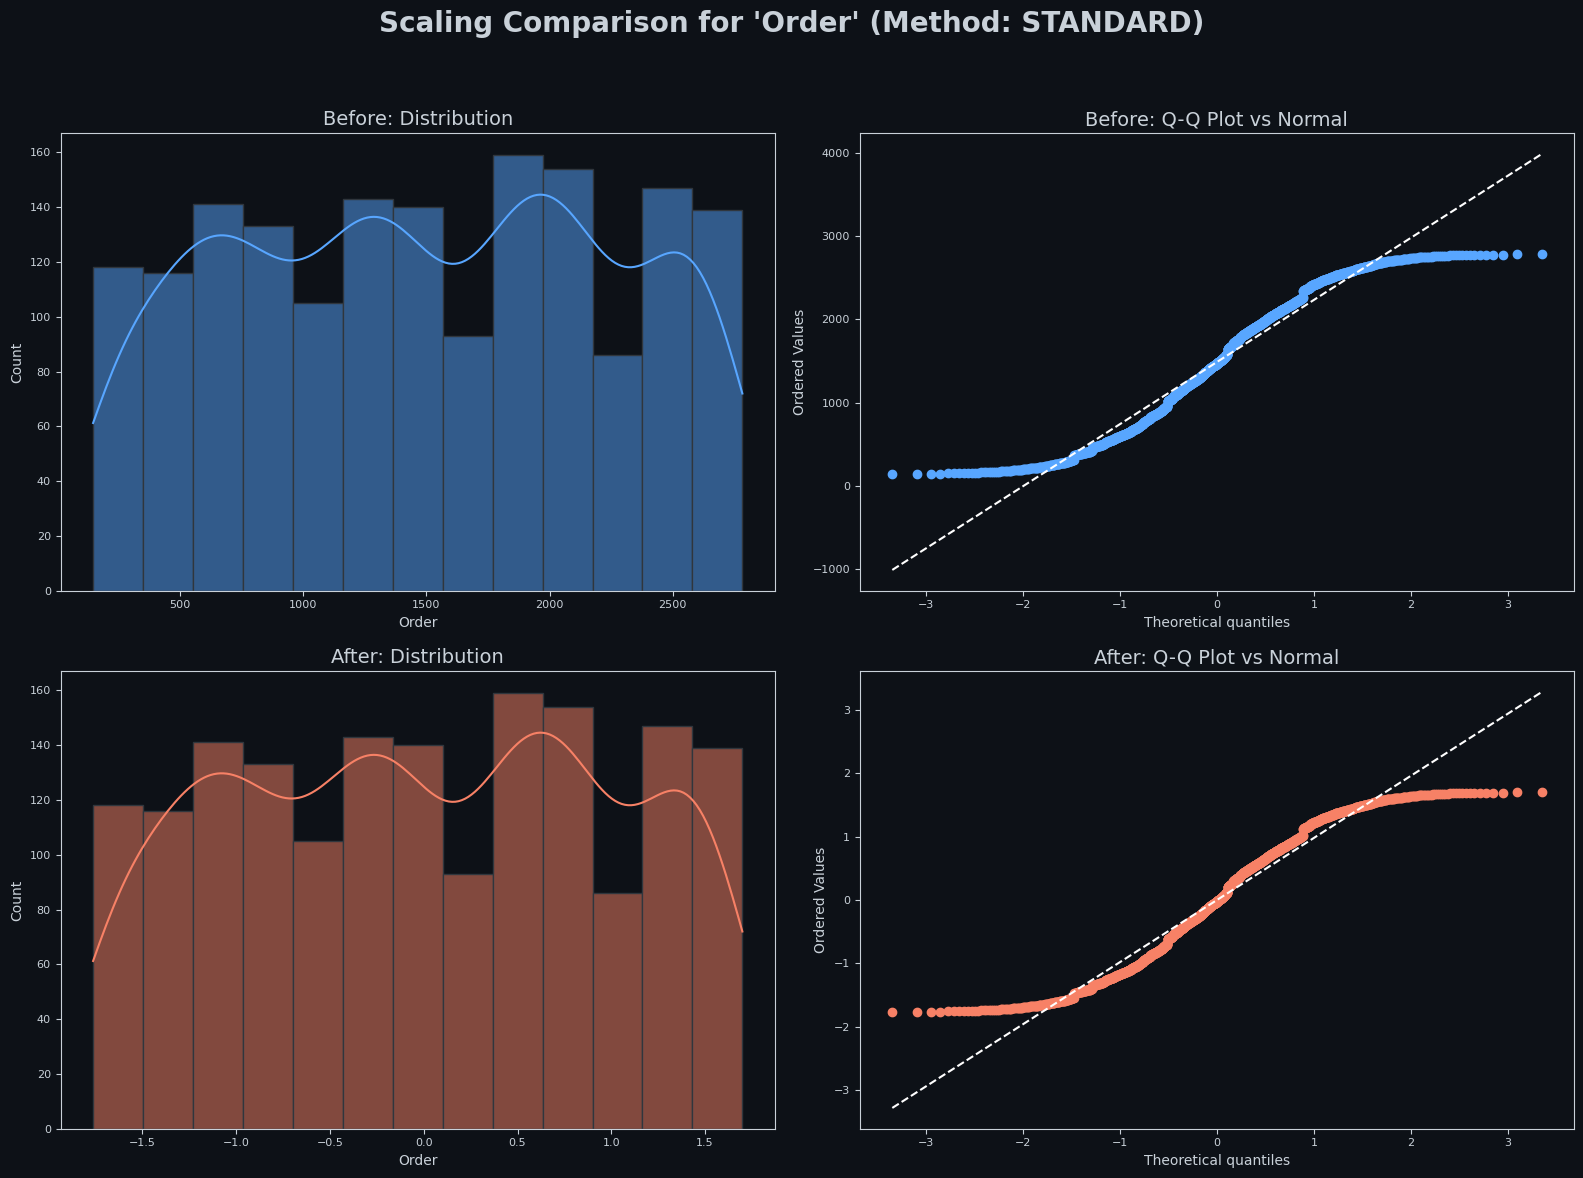

[('Neighborhood', {'unique_count': 23, 'missing_ratio': 0.0, 'correlation_with_target': 0.48369737696491955, 'ohe_memory_mb': 0.2937469482421875, 'recommended_encoding': 'target', 'sample_values': {'NAmes': 336, 'CollgCr': 178, 'OldTown': 134}}), ('Garage Finish', {'unique_count': 3, 'missing_ratio': 0.0, 'correlation_with_target': 0.395477480588918, 'ohe_memory_mb': 0.0383148193359375, 'recommended_encoding': 'ordinal_suggest', 'sample_values': {'Unf': 843, 'RFn': 489, 'Fin': 342}}), ('Bsmt Qual', {'unique_count': 4, 'missing_ratio': 0.0, 'correlation_with_target': 0.3767103363455428, 'ohe_memory_mb': 0.05108642578125, 'recommended_encoding': 'ordinal_suggest', 'sample_values': {'TA': 883, 'Gd': 693, 'Ex': 50}}), ('Exter Qual', {'unique_count': 4, 'missing_ratio': 0.0, 'correlation_with_target': 0.3591137244020314, 'ohe_memory_mb': 0.05108642578125, 'recommended_encoding': 'ordinal_suggest', 'sample_values': {'TA': 1128, 'Gd': 526, 'Fa': 14}}), ('Kitchen Qual', {'unique_count': 4, 'mi

Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal

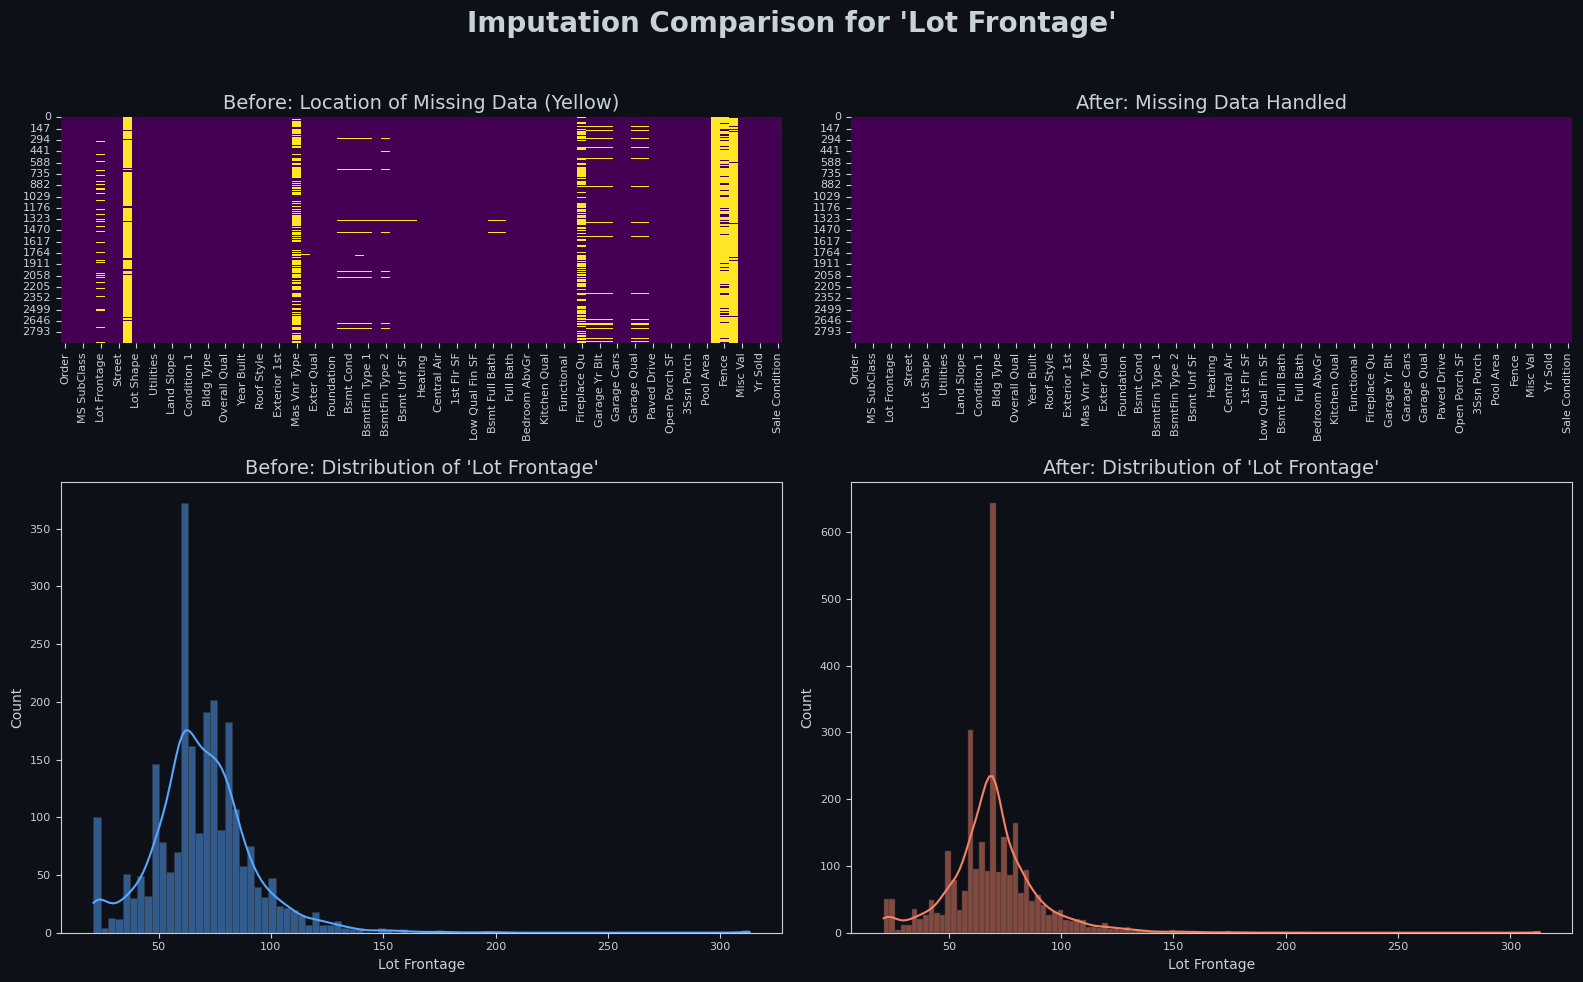
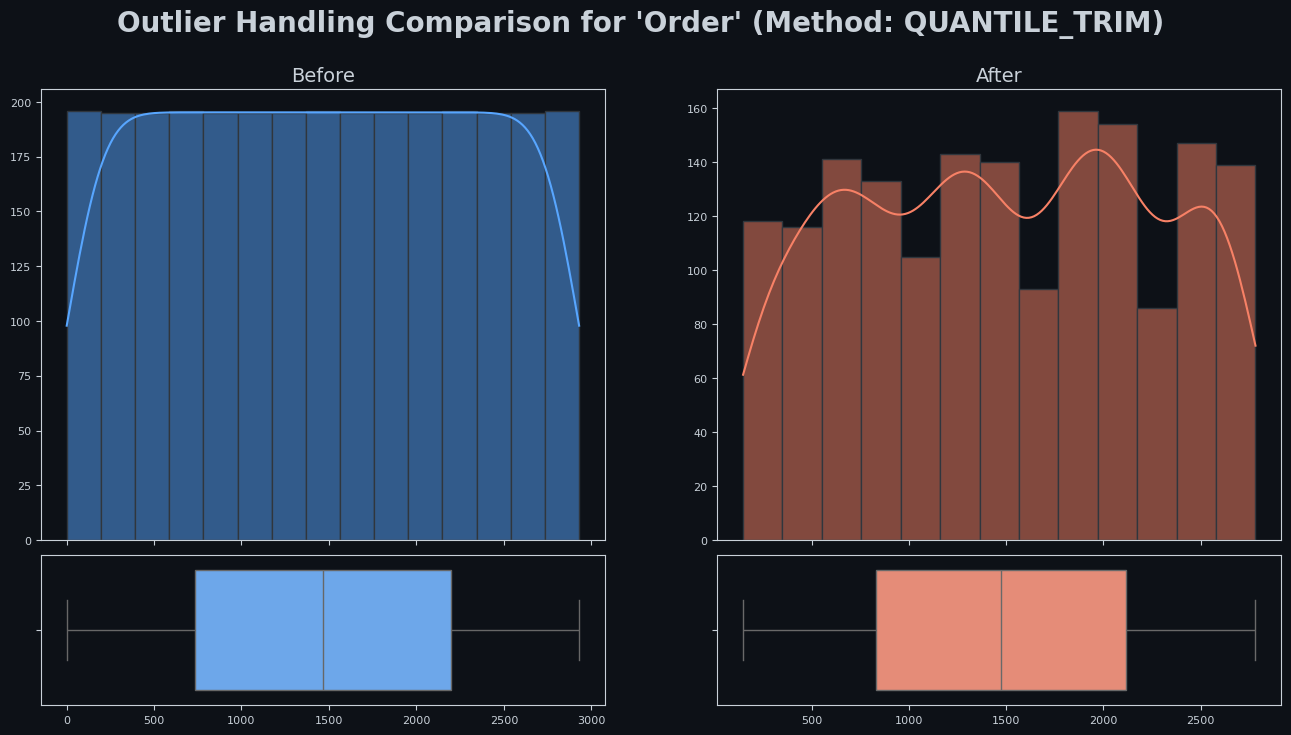
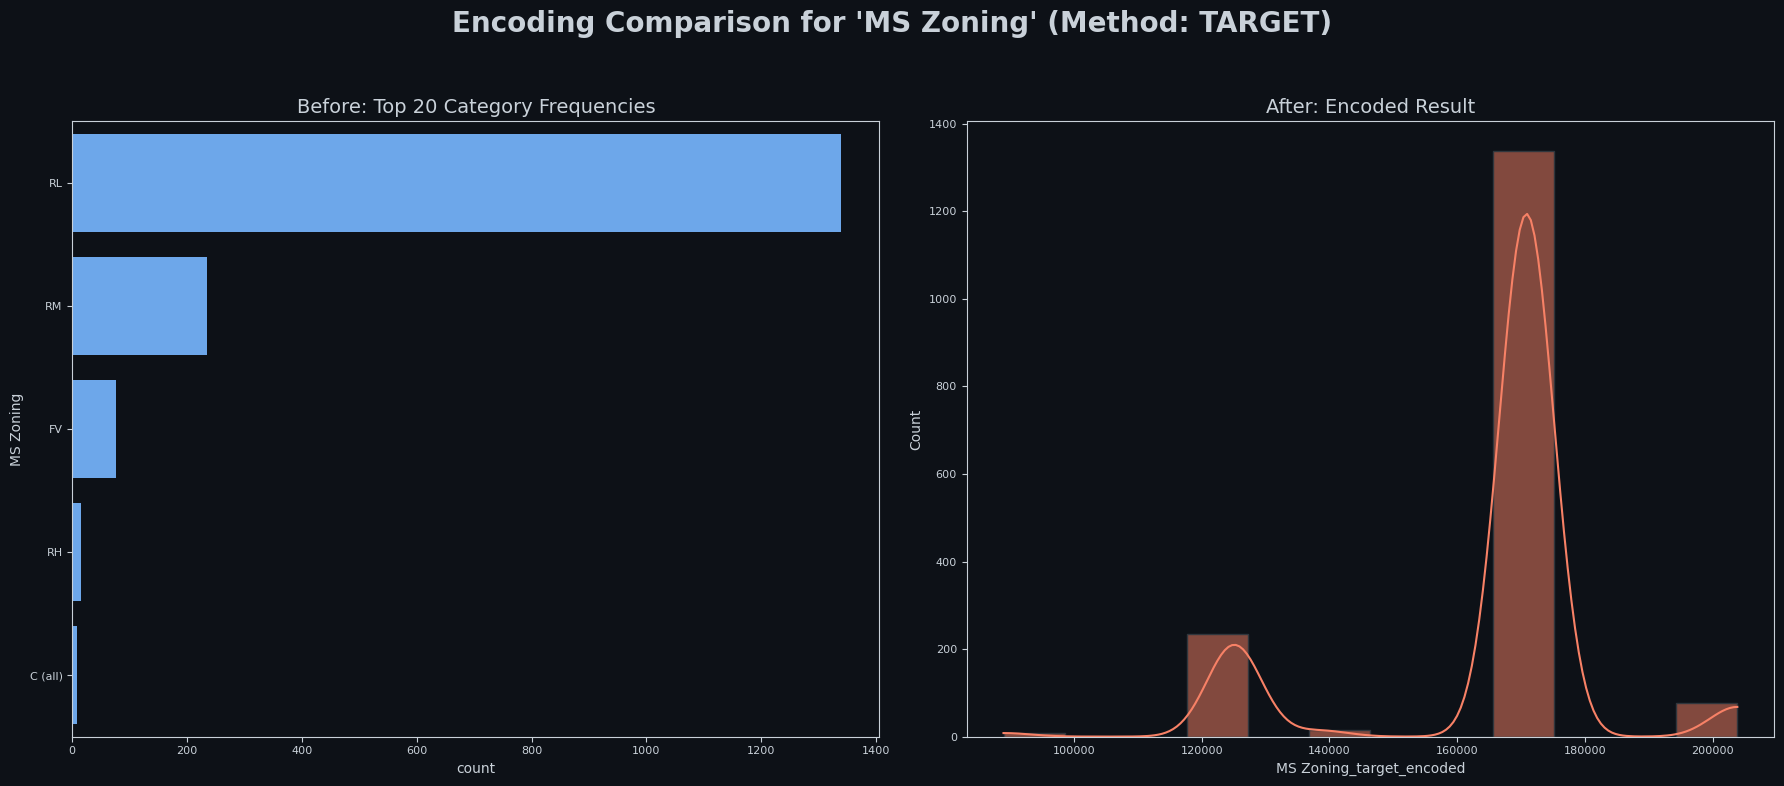

In [11]:
df_raw = pd.read_csv('../dataset_for_examples/AmesHousing.csv')


df_cleaned, dfisinstance = data_cleaner(
    data=df_raw,
    return_instance=True,
    target_column='SalePrice'
)

dfisinstance.generate_html_report()